<a href="https://colab.research.google.com/gist/lucyshef/d1aa303c27e347801f644e83193f0bfb/lab-sheet-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Sheet 1 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM3502-4502-6502 Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), School of [Computer Science](https://www.sheffield.ac.uk/cs "Open web page of School of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") by clicking on the icon on the right, but this notebook is displayed best when opened locally using Jupyter Notebook (e.g. as part of the [Anaconda](https://www.anaconda.com/) distribution which is already installed on the lab computers). <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/Lab-Sheet-1.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

<div class="alert alert-block alert-success">
<strong>Intended Learning Objectives (ILOs):</strong><br>
    
After completing this Jupyter Notenook you should
    
<ul>
<li>be familiar with the concept of importing libraries to extend Python's functionality
</li>
    
<li>be able to generate, visualise (and playback) sine signals and audio (WAVE) files downloaded from the Internet
</li>
    
<li>have an initial underdtanding of plotting signals over discrete time index $k$ or continuous time $t$
</li>

<li>understand basic use of functions from the <code>Python</code> libraries
    <ul>
    <li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html"><code>plot()</code></a>),
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>xlabel()</code></a>,
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>ylabel()</code></a>,
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html"><code>legend()</code></a>,
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html"><code>subplot()</code></a>,
        etc.)
    </li>
    <li><a href="https://numpy.org/doc/stable/index.html"><code>Numpy</code></a> for basic mathematical functions like
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.arange.html"><code>arange()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><code>linspace()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.sin.html"><code>sin()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.log10.html"><code>log10()</code></a>,
        etc.
    </li>
    <li>interactive Python class <code>IPython.display</code> (in particular the playback function
        <a href="https://ipython.org/ipython-doc/3/api/generated/IPython.display.html"><code>Audio()</code></a>)
    </li>
    </ul>
</li>
</ul>
</div>

## Use of external libraries

For the Speech Processing module, one of the intended learning outcomes is to understand basic functionality of signal processing algorithms for which you usually would use external libraries (e.g. `librosa`, `PyAudio` or similar). We try to avoid using these libraries as far as possible, until we understand the underlying principles.

However, some very basic functionality is provided by the following libraries (which we therefore will regularly use):

In [2]:
#Let's do some necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import numpy as np               # math

Further libraries, which we need less frequently will be imported when needed only in some notebooks (like e.g. the library `seaborn` which (in our Notebooks just change the plotting style or the library `soundfile` used below which allows to load and save audio files from/to hard disk). In case you get errors using such libraries you can install them using the command `!pip install <library-name>`.

```python
# remove the comment character (#) in case you need to install this library.
#!pip install seaborn
#!pip install soundfile
```

Once installed you can comment the line again using the comment character `#` to avoid that the install process is repeated each time you execute the cell.

Please also note, that is might be necessary to restart the iPython kernel alfer you installed a library.

In [3]:
try:
    import seaborn as sns; sns.set() # styling (optional)
except ModuleNotFoundError:
    import os
    print('Installing seaborn')
    print('If you still get an error for importing seaborn, please restart your iPython Kernel')
    os.system("!pip install seaborn")
    import seaborn as sns; sns.set() # styling (optional)

## Task 1: Generate, show and listen to a sine signal

A [sine signal](https://en.wikipedia.org/wiki/Sine_wave "Click for more information on Wikipedia") is defined as

\begin{equation}
x(t)= \mbox{sin}(2 \pi f t + \phi)
\label{eq:sin} \tag{1}
\end{equation}    

for a particular frequency $f$ and an initial phase $\phi$.

A sine signal can be generated using `numpy`'s sine function `np.sin()`.

To implement \eqref{eq:sin}, we first need a time vector $\mathbf{t}$ which can be created using `numpy`'s `arange()` function.

<br>
<div class="alert alert-block alert-info">
    
**Task 1:**
<ul>
<li>Generate a sine singal having a length of $\frac{1}{4}$ seconds and a frequency $f=250$ Hz at a sampling frequency of $f_s=8000$ Hz. Display the time domain signal and play it back. Please note that playback of sine signals may be of high volume, so please cosider to adapt the volume to a low and comfortable level during playback.
    <br>
    It makes sense to first generate a time vector $t$. Consider using one of the commands <a href="https://numpy.org/doc/stable/reference/generated/numpy.arange.html"><code>np.arange(...)</code></a> or <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><code>np.linspace(...)</code></a> (you can familiarise yourself with both functions by following the links to the general <code>numpy</code> documentation).
</li>
<li>Play around with different frequencies. Play around with phase shifts by setting $\phi \neq 0$.
</li>
</ul>
</div>

In [4]:
# create the signal

# Time specifications:
fs = 8000                        # samples per second
dt = 1/fs                        # seconds per sample
StopTime = 0.25                  # length of signal in seconds
#t = ...                          # time vector in seconds


# sine signal of frequency f
f = 250                          # frequency in hertz
#x = np.sin(2*np.pi*f*t)          # sine wave signal

num = fs*StopTime
print(f"num = {num}")
# create time vector t
t = np.linspace(0, StopTime, num=int(num))
print(f"t = {t}")

def generate_sine(t, f):
  signal = []
  for i in t:
    # print(f"iterating: {i}")
    x = np.sin(2*np.pi*f*i)
    # print(f"f(x) = {x}")
    signal.append(x)
  return signal

signal = generate_sine(t,f)

print(signal)




num = 2000.0
t = [0.00000000e+00 1.25062531e-04 2.50125063e-04 ... 2.49749875e-01
 2.49874937e-01 2.50000000e-01]
[np.float64(0.0), np.float64(0.19518665761287282), np.float64(0.38286491904875886), np.float64(0.5558152194157604), np.float64(0.707384545695642), np.float64(0.8317423633431303), np.float64(0.924104903969431), np.float64(0.9809191862621086), np.float64(0.9999996912662218), np.float64(0.9806124344329289), np.float64(0.9235032003710226), np.float64(0.8308688541733596), np.float64(0.7062728329075888), np.float64(0.5545080681253901), np.float64(0.38141261245611896), np.float64(0.19364506271933163), np.float64(-0.001571581470919187), np.float64(-0.19672777042077402), np.float64(-0.38431628001488083), np.float64(-0.5571209979148811), np.float64(-0.7084945113359373), np.float64(-0.8326138182175187), np.float64(-0.9247043251490037), np.float64(-0.98122351534857), np.float64(-0.9999972213971394), np.float64(-0.980303260618668), np.float64(-0.9228992158399084), np.float64(-0.82999329

Display the time domain signal given in [(1)](#mjx-eqn-eq%3Asin) using commands from the `matplotlib` library. To plot the audio signal $x(t)$ you might want to familiarise yourself with the following useful commands. Use [Google search](https://www.google.com/ "Open Google Serach in browser window.") (or another search service of your choice) to familiarise yourself with the Python and `matplotlib` help pages.

```python
# useful commands you may want to familiarise yourself with:
# plt.plot(...
# plt.xlabel(...
# plt.ylabel(...
# plt.legend(...
# plt.xlim(...
# plt.ylim(...
```

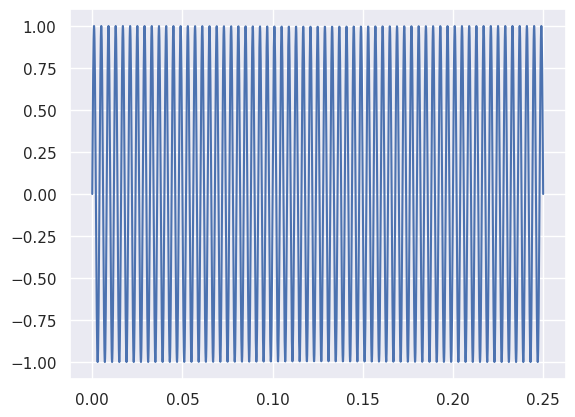

In [5]:
# plot the signal
# ...

plt.plot(t,signal)



Playback the sound file using the method `IPython.display.Audio(...)` from the library `IPython`). As a hint to avoid confusion: The `Audio()` command can be used for two different purposes, i.e. either for playback of a file directly from hard disk or for playback of a variable (see [`Audio` help pages](https://ipython.org/ipython-doc/stable/api/generated/IPython.display.html "Open help page for Audio command") for detailed info and examples):

```python
# load the file (here 'speech.wav') from hard disk and create playback widget
ipd.Audio('speech.wav')
# create playback widget for variable x and playback and sampling frequency fs
ipd.Audio(x,rate=fs)
```

In [6]:
import IPython.display as ipd # for interactive notebook elements

# playback the signal
# ...
ipd.Audio(signal, rate=fs)

## Task 2: Superposition of sine signals

Two (or more) sinosoidal signals can be added (which we call suposition).

\begin{equation}
x(t)= \mbox{sin}(2 \pi f_1 t + \phi_1) + \mbox{sin}(2 \pi f_2 t + \phi_2)
\end{equation}    


<br>
<div class="alert alert-block alert-info">
    
**Task 2:**
    
<ul>
<li> Generate two sinus functions of different frequency $f_1$ and $f_2$.
</li>  
<li> Diplay both signals as well as the sum of both signals in one figure using the `subplot` command.
</li>
<li> Play around with different frequencies. Add a phase to the sine argument and play around with different phases $\phi_1$ and $\phi_2$. Consider listening to the sum signal.
</li>
</ul>
</div>

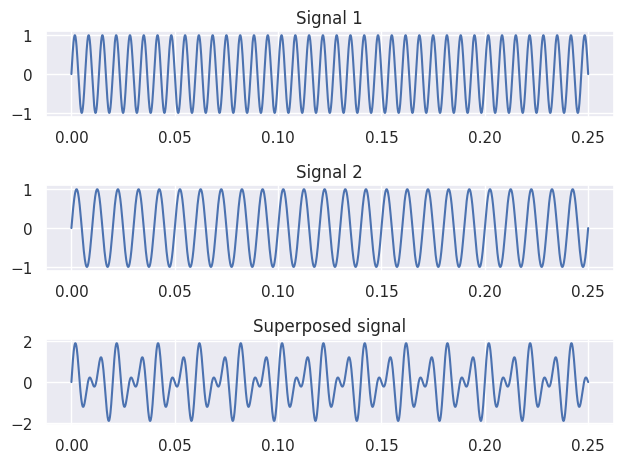

In [7]:
# put your code here
# ...
f1 = 150
f2 = 100

signal1 = generate_sine(t, f1)
signal2 = generate_sine(t, f2)

def superpose(signal1, signal2):
  superpose = []
  for i in range(0, len(signal1)):
    y = signal1[i] + signal2[i]
    superpose.append(y)
  return superpose

superpose = superpose(signal1, signal2)


# plt.plot(t, superpose)

# Create a figure with 3 rows and 1 columns of subplots
plt.subplot(3, 1, 1)  # top
plt.plot(t, signal1)
plt.title("Signal 1")

plt.subplot(3, 1, 2)  # top
plt.plot(t, signal2)
plt.title("Signal 2")

plt.subplot(3, 1, 3)  # top
plt.plot(t, superpose)
plt.title("Superposed signal")

plt.tight_layout()  # Adjust spacing
# plt.show()

ipd.Audio(superpose, rate=fs)



## Task 3: Handling Audio files

To process speech signals, we want to load a sound file. The following command downloads the file `https://staffwww.dcs.shef.ac.uk/people/n.ma/comx502/speech.wav` from the Internet to the hard disk.

```python
# download file containing speech
!curl https://staffwww.dcs.shef.ac.uk/people/n.ma/comx502/speech.wav -o speech.wav
```

This file can now be loaded into the variable `s` unsing the `soundfile` library.

```python
# load WAVE files
import soundfile as sf
s, fs = sf.read('speech.wav')
```

<div class="alert alert-block alert-info">
    
**Task 3:**
    
Load the wave file above and display the signal in the time domain. Listen to the signal    
</div>


In [8]:
# uncomment the line below if you need to install the seaborn library
# this has to be done only once
# you might have to restart the IPython kernel after install (only on older Jupyter Notebook installations)
#!pip install seaborn

In [9]:
# put your code here to load the wave file
!curl https://staffwww.dcs.shef.ac.uk/people/n.ma/comx502/speech.wav -o speech.wav
# ...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1812k  100 1812k    0     0  22.1M      0 --:--:-- --:--:-- --:--:-- 22.4M


In [10]:
# plot the time domain signal
import soundfile as sf
s, fs = sf.read('speech.wav')

print(f"what is s? {s}") # this is the signal
print(f"what is fs? {fs}") # this is the sample frequency
print(f"how many samples? {len(s)}")

# so I think we need to generate t
t = np.linspace(0, len(s), len(s))

print(t)

# ...
plt.plot(t, s)


ModuleNotFoundError: No module named 'soundfile'

In [ ]:
# put your code here to play the wave file
# ipd.Audio(...
ipd.Audio("speech.wav")
# ok but what about if we play my series - is it the same?
# ipd.Audio(s, rate=fs) # yes!

## Task 4: Decibels (dB) - Plot signal with linear amplitude and in logarithmic amplitue

The term [decibel](https://en.wikipedia.org/wiki/Decibel "Click to read more on decibels on Wikipedia") (usually abbreviated by dB) is commonly used to discuss or visualise levels, aplitudes, powers, etc. in relation to acoustic systems and signals (as well as in various different domains beyond speech and audio).

A signal (e.g. $s[k]$) can be displayed 'normally' (i.e. with linear amplitude) or *in dB*. Since humans perceive sound *in dB* it makes sense to familiarise ourselves with how to display signals in dB.


To plot an amplitude signal $s[k]$ (not a power of a signal $s^2[k]$) we can use (\ref{eq:defDBamplitude}).

\begin{equation}
s_{\mathrm{dB}}[k] = 20 \cdot \mathrm{log}_{10}\left( \left| s[k] + \epsilon \right| \right) \label{eq:defDBamplitude}\tag{2}
\end{equation}

The variable $\epsilon$ is introduced above as "a very small number" to aboid $\mathrm{log}(0)$ which would be not defined. Since for real-valued numbers the logarithm is only defined for positive valued, the absolute value $|\cdot |$ is applied before calculating the logarithm.

<br>
<div class="alert alert-block alert-info">
    
**Task 4:**
    
Plot the speech signal loaded above in decibel (dB) scale.
</div>

In [ ]:
# put your code here
# ...
def generate_decibels(signal):
  db = []
  for i in signal:
    s = 20 * np.log(np.abs(i)+0.0001)
    db.append(s)
  return db

decibels = generate_decibels(s)
print(decibels)

plt.plot(t, decibels)


## Copyright

This notebook is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) to be used during the lecture COM3502-4502-6502 Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), School of [Computer Science](https://www.sheffield.ac.uk/cs "Open web page of School of Computer Science, University of Sheffield"). You may download, [clone](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository) or [fork](https://docs.github.com/en/get-started/quickstart/fork-a-repo) it to your computer or private [GitHub](https://github.com/) account.